In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Seleccionar la variable

In [97]:
profile_variable = 'PTPM_CON'

### Cargar archivos con los datos de las estaciones, los perfiles de las variables y la deforestación

In [97]:
cuencaestacion_path_base = r'../data/stations'
cuencaestacion_files_path = f'{cuencaestacion_path_base}/Est*_316Cuencas.csv'
print('Cuencas por estación:', cuencaestacion_files_path)

profiles_path_base = r'../data/variables_profiles'
profile_files_path = f'{profiles_path_base}/*{profile_variable}_estacion_year.csv'
print('Perfiles:', profile_files_path)

deforestacion_path = r'../data/variables/FCL316Basins.csv'
print('Deforestacion:', deforestacion_path)

Cuencas por estación: ../data/stations/Est*_316Cuencas.csv
Perfiles: ../data/variables_profiles/*PTPM_CON_estacion_year.csv
Deforestacion: ../data/variables/FCL316Basins.csv


In [59]:
cuencaestacion_files = glob.glob(cuencaestacion_files_path)
print(cuencaestacion_files)

profile_files = glob.glob(profile_files_path)
print(profile_files)

['../data/stations\\EstPG_316Cuencas.csv', '../data/stations\\EstPM_316Cuencas.csv']
['../data/variables_profiles\\pluviografica_PTPM_CON_estacion_year.csv', '../data/variables_profiles\\pluviometrica_res_PTPM_CON_estacion_year.csv']


In [92]:
cuencaestacion_dtypes = {
    'CODIGO':'category',
    'CUENCA':'category'
}
cuencaestacion_cols = ['CODIGO', 'CUENCA']

cuencaestacion = pd.concat([pd.read_csv(file, sep=';', dtype = cuencaestacion_dtypes, usecols = cuencaestacion_cols) for file in cuencaestacion_files], axis = 0)
cuencaestacion.rename(columns=lambda x: x.lower(), inplace=True)
cuencaestacion.set_index('codigo', inplace = True)
print(cuencaestacion.shape)
cuencaestacion.head()

(2088, 1)


,cuenca
codigo,
11060030,194
11070070,195
11070080,195
11070090,195
11070100,195


In [77]:
profile_dtypes = {
    'CodigoEstacion':'category'
}

profiles = pd.concat([pd.read_csv(file, dtype = profile_dtypes) for file in profile_files], axis = 0)
profiles.rename({'CodigoEstacion':'codigo'}, axis = 1, inplace = True)
profiles.rename(columns=lambda x: 'y' + x if x.isnumeric() else x, inplace=True)
profiles.set_index('codigo', inplace = True)
print(profiles.shape)
profiles.head()

(1740, 30)


,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
codigo,,,,,,,,,,,,,,,,,,,,,
11110020,365,366,333,365,365,335,365,365,365,366,...,365,366,365,365,364,366,365,364,365,151
11110110,293,357,342,313,324,347,239,365,365,365,...,94,0,0,0,0,0,0,0,0,0
12010160,364,365,365,365,273,366,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12010170,305,366,365,365,344,31,0,0,0,0,...,365,366,365,358,365,366,365,365,241,109
12010180,363,357,352,359,364,275,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Unir los archivos

In [100]:
estaciones = pd.concat([cuencaestacion, profiles], join = 'inner', axis = 1)
#estaciones[(~estaciones.cuenca.isnull()) & (~estaciones.y1991.isnull())].shape
print(estaciones.shape)
estaciones.head()

(1356, 31)


,cuenca,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
codigo,,,,,,,,,,,,,,,,,,,,,
11110020,191,365,366,333,365,365,335,365,365,365,...,365,366,365,365,364,366,365,364,365,151
14010010,307,365,366,365,365,365,366,365,365,364,...,365,363,365,365,365,336,365,365,347,119
15010300,312,365,365,365,365,364,366,365,365,364,...,365,366,363,365,365,366,365,341,334,88
15060090,202,239,152,365,365,365,366,365,365,365,...,365,366,365,365,365,366,365,365,365,31
15060210,202,242,122,365,365,365,336,365,365,365,...,364,363,327,362,278,366,364,363,362,0


### Calcular la completitud para cada estación

In [103]:
year_ini = 2000
year_fin = 2018
variable_records_min_porc = 0.80

In [104]:
variable_records_min_days = int(365 * variable_records_min_porc)

cols_variable = ['y'+str(i) for i in range(year_ini, year_fin)]
print(f'Desde:{year_ini} hasta:{year_fin} %mín:{variable_records_min_porc} días mínimo:{variable_records_min_days}')

estaciones[f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'] = estaciones[cols_variable].apply(lambda x: len(estaciones[cols_variable].columns[x > variable_records_min_days]) / len(cols_variable) , axis = 1)
estaciones.head()

Desde:2000 hasta:2018 %mín:0.8 días mínimo:292


,cuenca,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,PTPM_CON_80_porc
codigo,,,,,,,,,,,,,,,,,,,,,
11110020,191,365,366,333,365,365,335,365,365,365,...,366,365,365,364,366,365,364,365,151,1.000000
14010010,307,365,366,365,365,365,366,365,365,364,...,363,365,365,365,336,365,365,347,119,0.944444
15010300,312,365,365,365,365,364,366,365,365,364,...,366,363,365,365,366,365,341,334,88,1.000000
15060090,202,239,152,365,365,365,366,365,365,365,...,366,365,365,365,366,365,365,365,31,1.000000
15060210,202,242,122,365,365,365,336,365,365,365,...,363,327,362,278,366,364,363,362,0,0.944444


[Text(0, 0.5, 'Estaciones'),
 Text(0.5, 0, '%'),
 Text(0.5, 1.0, 'PTPM_CON % de años con registro anual mayor a 80.0% (292 días)')]

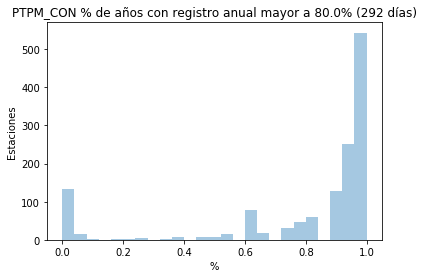

In [127]:
variable_full = f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'
ax = sns.distplot(estaciones[variable_full], kde = False)
ax.set(xlabel = '%', ylabel = 'Estaciones', 
       title = f'{profile_variable} % de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)')

In [123]:
cuencas_completitud = estaciones.groupby('cuenca')[variable_full].max().reset_index() 

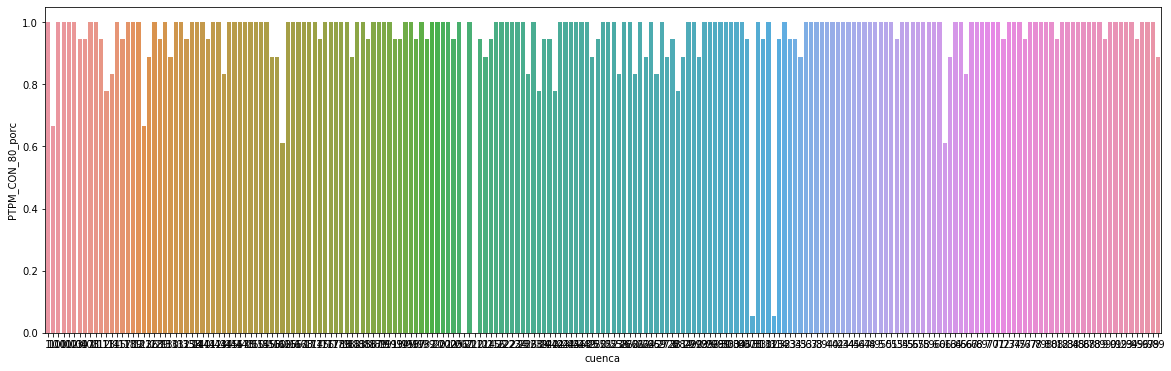

In [149]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x = 'cuenca', y = variable_full, data = cuencas_completitud)
ax.set_xlabel('cuenca')
#ax.set(xlabel = 'cuenca', ylabel = '% años', 
#       title = f'{profile_variable} por Cuenca % de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)')
#sns.despine(left=True, bottom=True)

In [152]:
variable_completitud = f'{profile_variable}_{int(variable_records_min_porc * 100)}_compl'
cuencas_completitud[variable_completitud] = cuencas_completitud[variable_full].apply(lambda x: 1 if x == 1 else 0)
print('Número de cuencas con al menos una estacion al 100% de años', cuencas_completitud[variable_completitud].value_counts()[1])

Número de cuencas con 100% de años 145
